# Analysis of activity durations
Analyze the durations of activivities right before pt legs to investigate, how many activities we have that are very short.

In [54]:
%config InlineBackend.figure_format = 'retina'
import pandas as pd

In [55]:
df = pd.read_csv("/Users/paulh/git/parallel-qsim-berlin/output/v6.4/1pct/output-12/activities.csv")

# filter out act_types that contain "interaction"
df_no_stage = df[~df["act_type"].str.contains("interaction", case=False, na=False)].copy()

# only split values with numeric part after underscore
extracted = df_no_stage['act_type'].str.extract(r'^(.+)_(\d+)$')
df_no_stage['typical_duration'] = extracted[1]
df_no_stage['act_type'] = extracted[0].fillna(df_no_stage['act_type'])

df_no_stage['typical_duration'] = pd.to_numeric(df_no_stage['typical_duration'])
#
# df_no_stage = df[df["act_type"] != "pt interaction"]
# df_no_stage

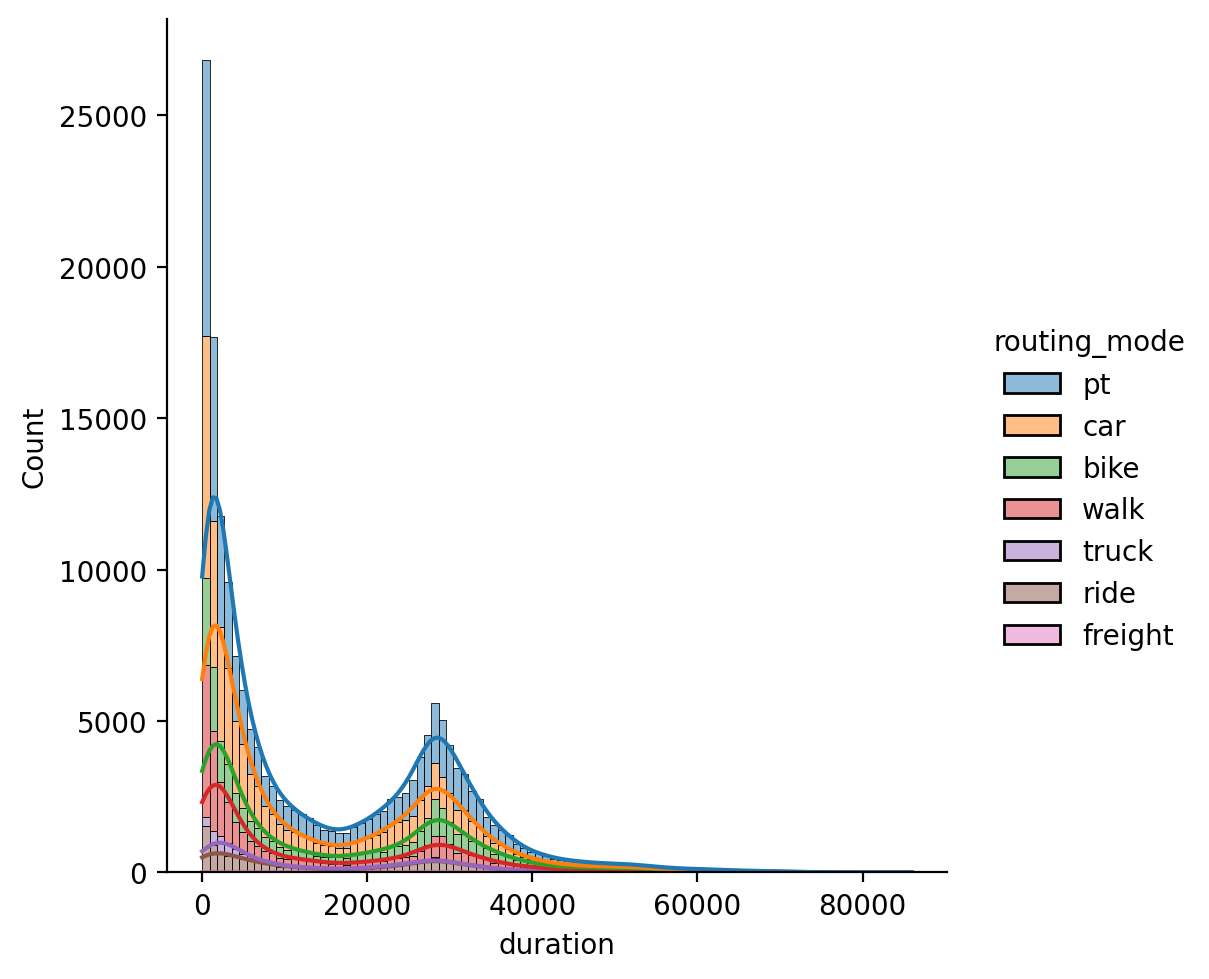

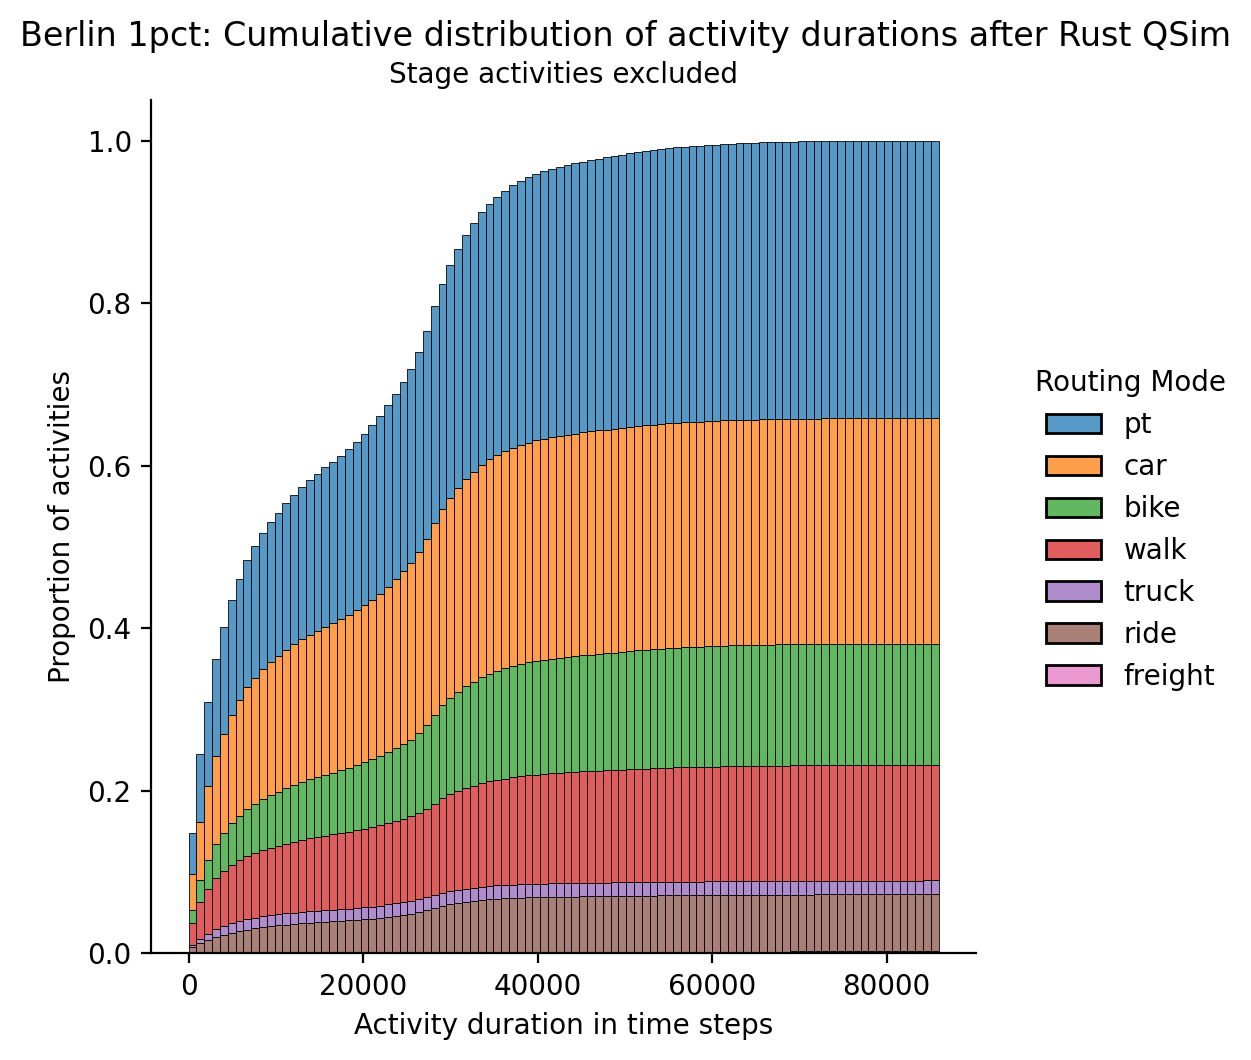

In [63]:
# plot the distribution of activity durations for activities that are not pt interaction
import seaborn as sns
import matplotlib.pyplot as plt

# plt.figure(dpi=300)
sns.displot(data=df_no_stage, x="duration", kde=True, hue="routing_mode", multiple="stack")
# plot cumulative distribution function (CDF) of activity durations for activities that are not pt interaction relative

g = sns.displot(data=df_no_stage, x="duration", kde=False, cumulative=True, stat="proportion", hue="routing_mode", multiple="stack")
g.set_axis_labels("Activity duration in time steps", "Proportion of activities")
g.figure.suptitle("Berlin 1pct: Cumulative distribution of activity durations after Rust QSim", y=1.05)
g.ax.set_title("Stage activities excluded", fontsize=10)
g._legend.set_title("Routing Mode")

# p.set_axis_labels("Activity duration in time steps", "Proportion of activities")
# p.figure.suptitle("Cumulative distribution of activity durations (stage activities excluded)")

In [20]:
# group by act_type and typical_duration and print the number of rows per group
df_no_stage.groupby(["act_type"]).size()


act_type
dining                 1803
edu_higher              820
edu_kiga                721
edu_other               463
edu_primary             755
edu_secondary          1020
home                  24526
leisure                5177
other                   641
outside_recreation     2123
personal_business      3801
shop_daily             5344
shop_other             2257
transport              2977
work                   8150
work_business          1441
dtype: int64